In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [2]:
data_path = '../../../../data/Admission_Predict_Ver1.1.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Целевой переменной является вероятность приёма в университет — Chance of Admit (ranging from 0 to 1 )

Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

## Задача 1:

Сколько всего абитуриентов в выборке?

In [5]:
df.shape[0]

500

## Задача 2:

Составьте корреляциюнную матрицу перечисленных признаков вместе с целевой переменной, исключив столбец Serial No.

В поля для ответа впишите, округлив до двух знаков после точки:

In [6]:
# корреляцию между Chance of Admit и GRE Scores
df[['GRE Score', 'Chance of Admit ']].corr()

,GRE Score,Chance of Admit
GRE Score,1.000000,0.810351
Chance of Admit,0.810351,1.000000


In [7]:
# корреляцию между Chance of Admit и Research Experience
df[['Research', 'Chance of Admit ']].corr()

,Research,Chance of Admit
Research,1.000000,0.545871
Chance of Admit,0.545871,1.000000


In [8]:
# корреляцию между GRE Scores и Research Experience
df[['Research', 'GRE Score']].corr()

,Research,GRE Score
Research,1.000000,0.563398
GRE Score,0.563398,1.000000


## Задача 3

Какой признак сильнее всех скоррелирован с целевым параметром?

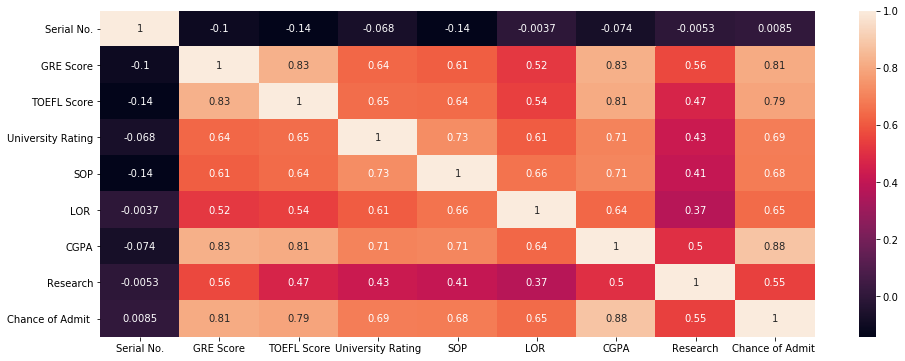

In [9]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=df.corr(method='pearson'), annot=True)

Ответ: **CGPA**

## Задача 4

Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).

В каком случае признаки сильнее скоррелированы между собой?

In [11]:
df_research_0 = df[df['Research'] == 0]
df_research_1 = df[df['Research'] == 1]

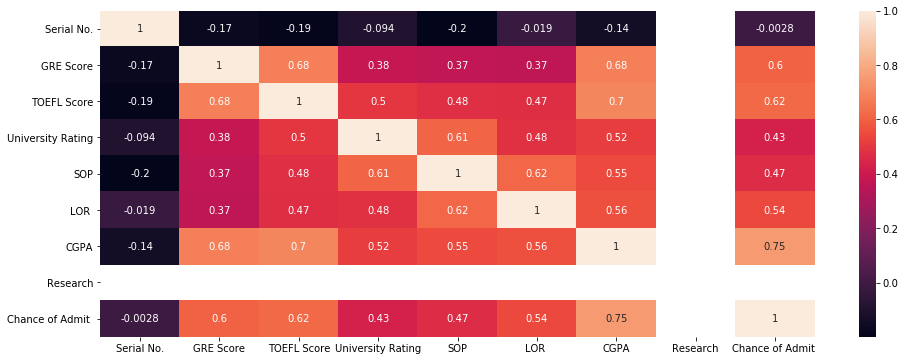

In [14]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=df_research_0.corr(method='pearson'), annot=True)

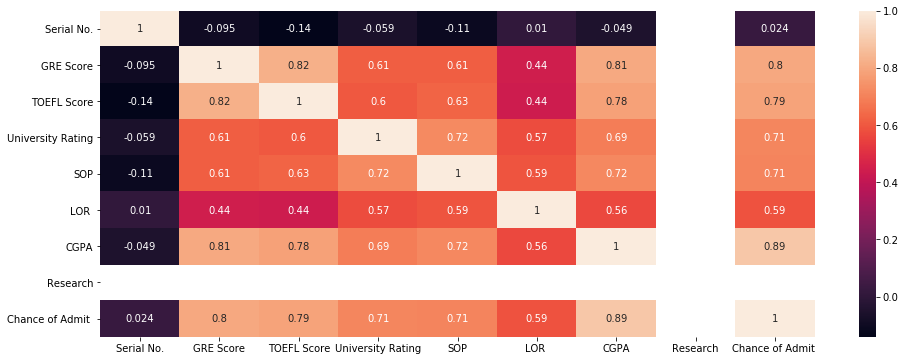

In [15]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=df_research_1.corr(method='pearson'), annot=True)

Ответ: Выборка людей с наличием опыта исследовательской работы показывает более скореллированные признаки между собой

## Задача 5

В случае, когда корреляции между данными меньше, какие признаки наиболее скоррелированы с целевой переменной?

- TOEFL Score, SOP
- GRE Score, CGPA
- **TOEFL Score, CGPA**

## Задача 6

Постройте OLS регрессию Chance of Admission на выбранные в предыдущей задаче признаки без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [24]:
df_research_0[['TOEFL Score', 'SOP', 'GRE Score', 'CGPA', 'Chance of Admit ']].head()

,TOEFL Score,SOP,GRE Score,CGPA,Chance of Admit
4,103,2.0,314,8.21,0.65
7,101,3.0,308,7.90,0.68
8,102,2.0,302,8.00,0.50
9,108,3.5,323,8.60,0.45
15,105,3.5,314,8.30,0.54
